# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

## 0) Setup

Import pandas **with the correct name** .

In [1]:
import pandas

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`. Trying `read_excel` the first time will probably not work, you'll get an error message. Be sure to read the error carefully: *you probably need to install a new library before it will work, and the error tells you what the library is named*.

In [2]:
import openpyxl

In [3]:
df = pandas.read_excel('richpeople.xlsx')

In [4]:
!pip install openpyxl

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [5]:
df.shape

(1653, 30)

In [6]:
df.dtypes

year                         int64
name                        object
rank                         int64
citizenship                 object
countrycode                 object
networthusbillion          float64
selfmade                    object
typeofwealth                object
gender                      object
age                        float64
industry                    object
IndustryAggregates          object
region                      object
north                        int64
politicalconnection        float64
founder                      int64
generationofinheritance     object
sector                      object
company                     object
companytype                 object
relationshiptocompany       object
foundingdate               float64
gdpcurrentus               float64
sourceofwealth              object
notes                       object
notes2                      object
source                      object
source_2                    object
source_3            

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [7]:
df.sort_values(by='networthusbillion', ascending=False).head(10)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
184,2014,Bill Gates,1,United States,USA,76.0,self-made,founder non-finance,male,58.0,...,founder,1975.0,NaN,Microsoft,NaN,NaN,http://www.forbes.com/profile/bill-gates/,NaN,NaN,NaN
226,2014,Carlos Slim Helu,2,Mexico,MEX,72.0,self-made,privatized and resources,male,74.0,...,founder,1990.0,NaN,telecom,NaN,NaN,http://www.ozy.com/provocateurs/carlos-slims-w...,NaN,NaN,NaN
79,2014,Amancio Ortega,3,Spain,ESP,64.0,self-made,founder non-finance,male,77.0,...,founder,1975.0,NaN,retail,NaN,NaN,http://www.forbes.com/profile/amancio-ortega/,NaN,NaN,NaN
1562,2014,Warren Buffett,4,United States,USA,58.2,self-made,founder non-finance,male,83.0,...,founder,1839.0,NaN,Berkshire Hathaway,NaN,NaN,http://www.forbes.com/lists/2009/10/billionair...,http://www.forbes.com/companies/berkshire-hath...,NaN,NaN
862,2014,Larry Ellison,5,United States,USA,48.0,self-made,founder non-finance,male,69.0,...,founder,1977.0,NaN,Oracle,NaN,NaN,http://www.forbes.com/profile/larry-ellison/,http://www.businessinsider.com/how-larry-ellis...,NaN,NaN
339,2014,David Koch,6,United States,USA,40.0,inherited,inherited,male,73.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
247,2014,Charles Koch,6,United States,USA,40.0,inherited,inherited,male,78.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
1364,2014,Sheldon Adelson,8,United States,USA,38.0,self-made,self-made finance,male,80.0,...,founder,1952.0,NaN,casinos,NaN,NaN,http://www.forbes.com/profile/sheldon-adelson/,http://lasvegassun.com/news/1996/nov/26/rat-pa...,NaN,NaN
280,2014,Christy Walton,9,United States,USA,36.7,inherited,inherited,female,59.0,...,relation,1962.0,NaN,Wal-Mart,widow,NaN,http://www.forbes.com/profile/christy-walton/,NaN,NaN,NaN
724,2014,Jim Walton,10,United States,USA,34.7,inherited,inherited,male,66.0,...,relation,1962.0,NaN,Wal-Mart,inherited from father,NaN,http://www.forbes.com/profile/jim-walton/,NaN,NaN,NaN


## 4a) How many male billionaires are there compared to the number of female billionares?

> **TIP:** The last part uses `groupby`, but the count/percent part does not.
> **TIP:** When I say "average," you can pick what kind of average you use.

In [8]:
df.gender.value_counts()

gender
male      1473
female     180
Name: count, dtype: int64

In [9]:
num_male = df[df.gender == 'male']["gender"].count()
num_female = df[df.gender == 'female']["gender"].count()
round(num_male/num_female,2)

8.18

## 4b) What percent is that?

In [10]:
round(num_male/(num_male + num_female)*100,2)

89.11

## 4c) Is the average wealth different for a female billionaire as compared to a male billionaire?

In [11]:
df.groupby(by = 'gender').networthusbillion.mean()

gender
female    3.920556
male      3.902716
Name: networthusbillion, dtype: float64

## 5a) What is the most common source/type of wealth?

In [12]:
df.typeofwealth.value_counts()

typeofwealth
inherited                   506
founder non-finance         467
self-made finance           344
privatized and resources    192
executive                   142
Name: count, dtype: int64

## 5b) Is the most common source/type of wealth different between men and women?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???
>
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [13]:
df.groupby(by = 'gender').typeofwealth.value_counts()

gender  typeofwealth            
female  inherited                   142
        founder non-finance          21
        executive                     6
        self-made finance             6
        privatized and resources      5
male    founder non-finance         446
        inherited                   364
        self-made finance           338
        privatized and resources    187
        executive                   136
Name: count, dtype: int64

## 6) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.
>
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

<Axes: ylabel='company'>

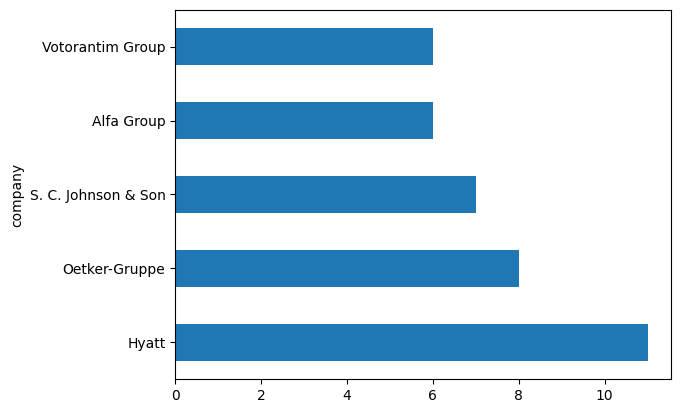

In [14]:
df.company.value_counts().sort_values(ascending=False).head(5).plot(kind='barh')

## 7) How much money do these top 5 billionaires have in total?

In [15]:
top_five_networth = df.sourceofwealth.value_counts().head(5)
top_five_networth.sum()

341

## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [16]:
citizenship_networth = df.groupby(by = 'citizenship').networthusbillion.sum()
citizenship_networth.sort_values(ascending=False).head(5)

citizenship
United States    2322.4
Russia            422.5
Germany           401.4
China             375.8
France            235.3
Name: networthusbillion, dtype: float64

## 9a) How old is an average billionaire?

In [17]:
round(df.age.mean(),2)

63.34

## 9b) How old are self-made billionaires compared to non self-made billionaires? 

In [30]:
df.groupby(by='selfmade').age.mean()

selfmade
inherited    64.962185
self-made    62.625899
Name: age, dtype: float64

In [33]:
df_selfmade = df.groupby(by='selfmade')
df_inherited = df_selfmade.get_group('inherited')
df_self_made = df_selfmade.get_group('self-made')

df_inherited.age.mean() - df_self_made.age.mean()

2.3362855933740434

## 10a) Who are the three youngest billionaires? Who are the three oldest?

In [38]:
df.sort_values(by='age', ascending=True).head(3)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
1172,2014,Perenna Kei,1284,Hong Kong,HKG,1.3,inherited,inherited,female,24.0,...,relation,1996.0,NaN,real estate,inherited from father,NaN,http://en.wikipedia.org/wiki/Perenna_Kei,http://www.loganestate.com/en/about.aspx?ftid=294,NaN,NaN
397,2014,Dustin Moskovitz,202,United States,USA,6.8,self-made,founder non-finance,male,29.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://en.wikipedia.org/wiki/Dustin_Moskovitz,http://www.forbes.com/profile/dustin-moskovitz/,https://www.facebook.com/facebook/info?tab=pag...,NaN
1004,2014,Mark Zuckerberg,21,United States,USA,28.5,self-made,founder non-finance,male,29.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://www.forbes.com/profile/mark-zuckerberg/,NaN,NaN,NaN


## 10b) Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

<Axes: xlabel='age'>

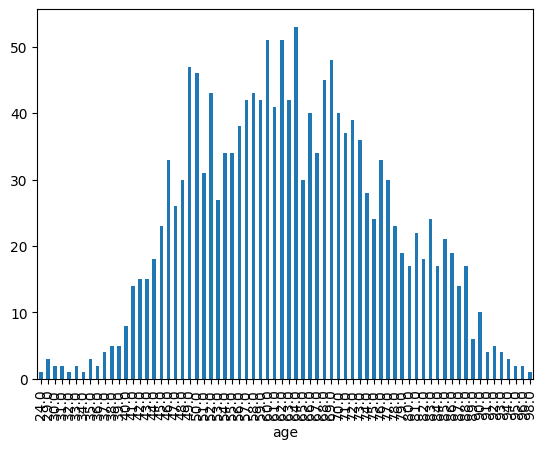

In [57]:
df.age.value_counts().sort_index(ascending=True).plot(kind='bar')

<Axes: >

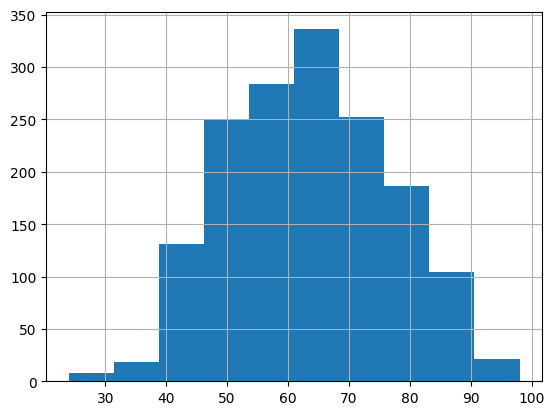

In [58]:
df.age.sort_index(ascending=True).hist()

## 11) Make a scatterplot of net worth compared to age

It's more fun to do this in Altair as compared to matplotlib, but either is fine.

<Axes: xlabel='age', ylabel='networthusbillion'>

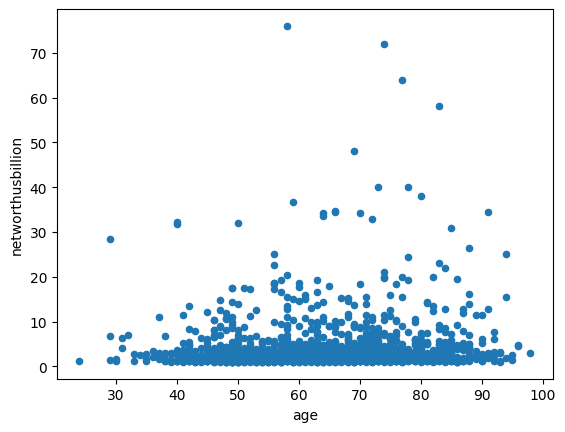

In [60]:
df.plot(kind='scatter',x='age',y='networthusbillion')

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

<Axes: xlabel='name'>

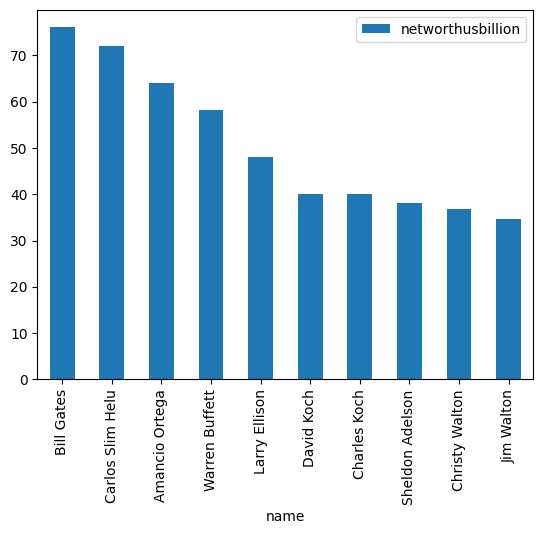

In [66]:
df_sorted = df.sort_values(by='networthusbillion', ascending=False).head(10)
df_sorted.plot(x='name',y='networthusbillion',kind = 'bar')